In [1]:
import mapvbvd
import numpy as np 

Full Fourier - One Slice

In [ ]:
file = "/neurospin/lrmn/people/Caroline_LeSter/Example_EPI/scannerData/meas_MID208_epi2d_bold_cor_30rep_ref_FID1134.dat"
twixObj = mapvbvd.mapVBVD(file)
twixObj.image.flagRemoveOS = False
twixObj.image.squeeze = True

kspace_data = twixObj.image[''][:,:,:,0,0]
print(kspace_data.shape)
kspace_data = np.moveaxis(kspace_data, (0,1,2),(2,0,1))
print(kspace_data.shape)
kspace_data = np.reshape(kspace_data, (32,kspace_data.shape[1]*kspace_data.shape[2]))
print(kspace_data.shape)

"""kspace_obs = np.zeros((32,8192*30), np.complex64)
for i in range(30):
    kspace_data = twixObj.image[''][:,:,:,i,0]
    kspace_data = np.moveaxis(kspace_data, (0,1,2),(2,0,1))
    kspace_data = np.reshape(kspace_data, (32,kspace_data.shape[1]*kspace_data.shape[2]))
    kspace_obs[:,i*8192:(i+1)*8192] = kspace_data

kspace_obs.shape"""

SMS EPI 

In [2]:
file = "/neurospin/lrmn/people/Caroline_LeSter/20220517_MonkeyBrain_skope/test_reco_SMS/meas_MID85_cmrr_mbep2d_bold_Propre_FID27916.dat"
twixObj = mapvbvd.mapVBVD(file)
twixObj.image.flagRemoveOS = False
twixObj.image.squeeze = True

kspace_data = twixObj.image[''][:,:,:,:,0,0]
print(kspace_data.shape)
kspace_data = np.moveaxis(kspace_data, (0,1,2,3),(2,0,1,3))
print(kspace_data.shape)
kspace_data = np.reshape(kspace_data, (32,kspace_data.shape[1]*kspace_data.shape[2]*kspace_data.shape[3]))
print(kspace_data.shape)
"""
kspace_obs = np.zeros((32,8192*30*10), np.complex64)
for i in range(30):
    kspace_data = twixObj.image[''][:,:,:,:,i,0]
    kspace_data = np.moveaxis(kspace_data, (0,1,2,3),(2,0,1,3))
    kspace_data = np.reshape(kspace_data, (32,kspace_data.shape[1]*kspace_data.shape[2]*kspace_data.shape[3]))
    kspace_obs[:,i*8192*10:(i+1)*8192*10] = kspace_data

kspace_obs.shape"""

pymapVBVD version 0.4.2
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/95.0M [00:00<?, ?B/s]

read data:   0%|          | 0/1920 [00:00<?, ?it/s]

(128, 32, 64, 20)
(32, 64, 128, 20)
(32, 163840)


"\nkspace_obs = np.zeros((32,8192*30*10), np.complex64)\nfor i in range(30):\n    kspace_data = twixObj.image[''][:,:,:,:,i,0]\n    kspace_data = np.moveaxis(kspace_data, (0,1,2,3),(2,0,1,3))\n    kspace_data = np.reshape(kspace_data, (32,kspace_data.shape[1]*kspace_data.shape[2]*kspace_data.shape[3]))\n    kspace_obs[:,i*8192*10:(i+1)*8192*10] = kspace_data\n\nkspace_obs.shape"

In [3]:
import scipy.io 
kmatrix = scipy.io.loadmat("/neurospin/lrmn/people/Caroline_LeSter/20220517_MonkeyBrain_skope/test_reco_SMS/matlab.mat")['ksphaFilt']

"""[:64*30*10,1:4,:]
kmatrix = np.moveaxis(kmatrix, (0,1,2),(0,2,1))
kspace_loc = np.reshape(kmatrix, (kmatrix.shape[0]*kmatrix.shape[1], kmatrix.shape[2]))
kspace_loc.shape"""
kmatrix.shape

(40000, 4, 20)

In [117]:
import scipy.io 
import numpy as np
kmatrix = scipy.io.loadmat("/neurospin/lrmn/people/nicolas_boulant/MeasSimon/49.mat")['ksphaFilt'][:,:]
print(kmatrix.shape)
#kmatrix = np.moveaxis(kmatrix, (0,1,2),(0,2,1))[::]
#kspace_loc = np.reshape(kmatrix, (kmatrix.shape[0]*kmatrix.shape[1]))
kspace_loc.shape

(40000, 4)


(160000,)

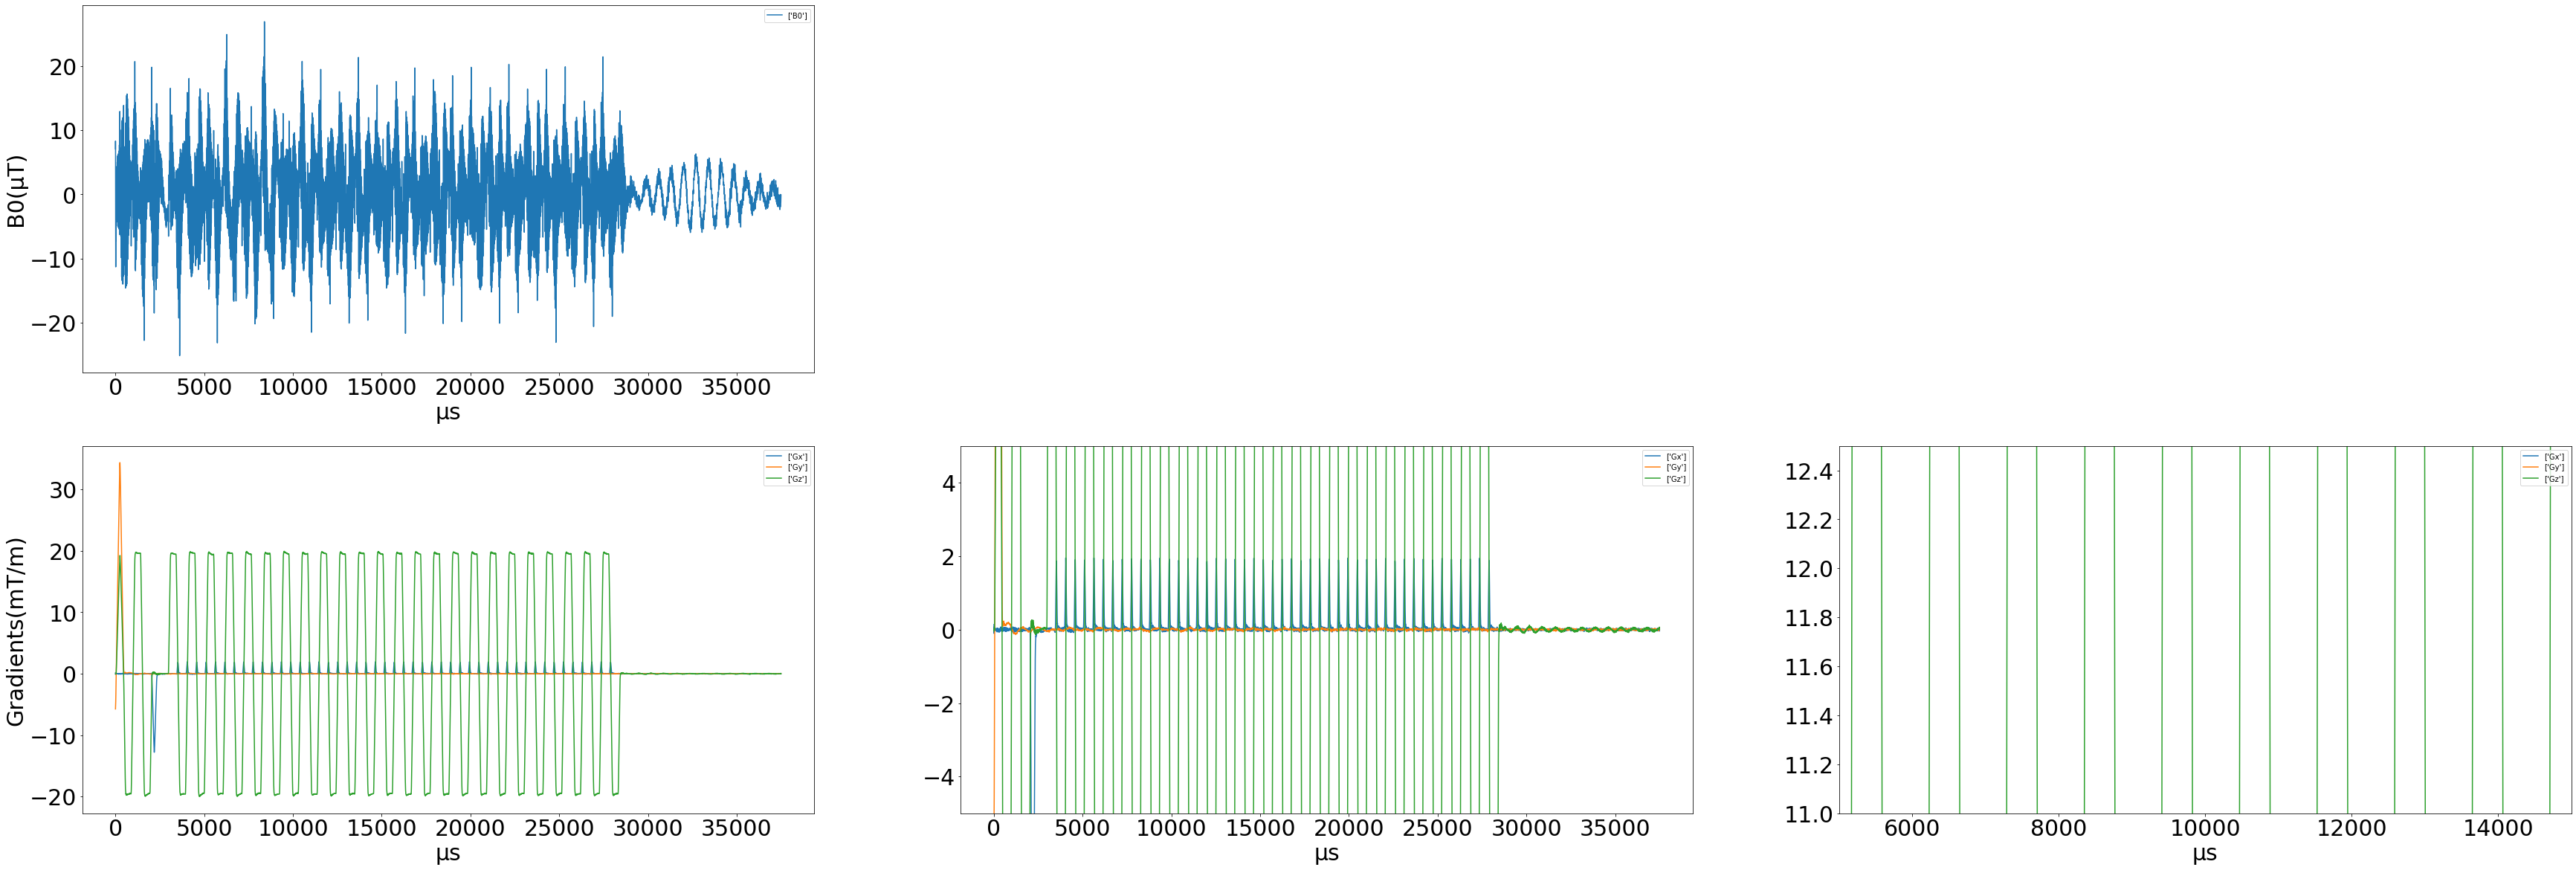

In [107]:
import matplotlib.pyplot as plt
dw_time = 1e-6
ft=30
plt.figure(figsize=(60,20))
plt.subplot(2,3,1)
plt.plot(np.diff(kmatrix[2500:,0]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e6, label=['B0'])
plt.ylabel("B0(µT)", fontsize=ft)
plt.xlabel("µs", fontsize=ft)
plt.yticks(fontsize=ft)
plt.xticks(fontsize=ft)
plt.legend()
plt.subplot(2,3,4)
plt.plot(np.diff(kmatrix[2500:,1]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gx'])
plt.plot(np.diff(kmatrix[2500:,2]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gy'])
plt.plot(np.diff(kmatrix[2500:,3]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gz'])
plt.legend()
plt.ylabel("Gradients(mT/m)", fontsize=ft)
plt.xlabel("µs", fontsize=ft)
plt.yticks(fontsize=ft)
plt.xticks(fontsize=ft)
plt.subplot(2,3,5)
plt.plot(np.diff(kmatrix[2500:,1]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gx'])
plt.plot(np.diff(kmatrix[2500:,2]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gy'])
plt.plot(np.diff(kmatrix[2500:,3]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gz'])
plt.legend()
plt.ylim(-5,5)
plt.xlabel("µs", fontsize=ft)
plt.yticks(fontsize=ft)
plt.xticks(fontsize=ft)
plt.subplot(2,3,6)
plt.plot(np.diff(kmatrix[2500:,1]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gx'])
plt.plot(np.diff(kmatrix[2500:,2]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gy'])
plt.plot(np.diff(kmatrix[2500:,3]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gz'])
plt.legend()
plt.ylim(11,12.5)
plt.xlim(5000,15000)
plt.yticks(fontsize=ft)
plt.xticks(fontsize=ft)
plt.xlabel("µs", fontsize=ft)
plt.savefig("/neurospin/lrmn/people/nicolas_boulant/MeasSimon/Baseline_2nd.png")

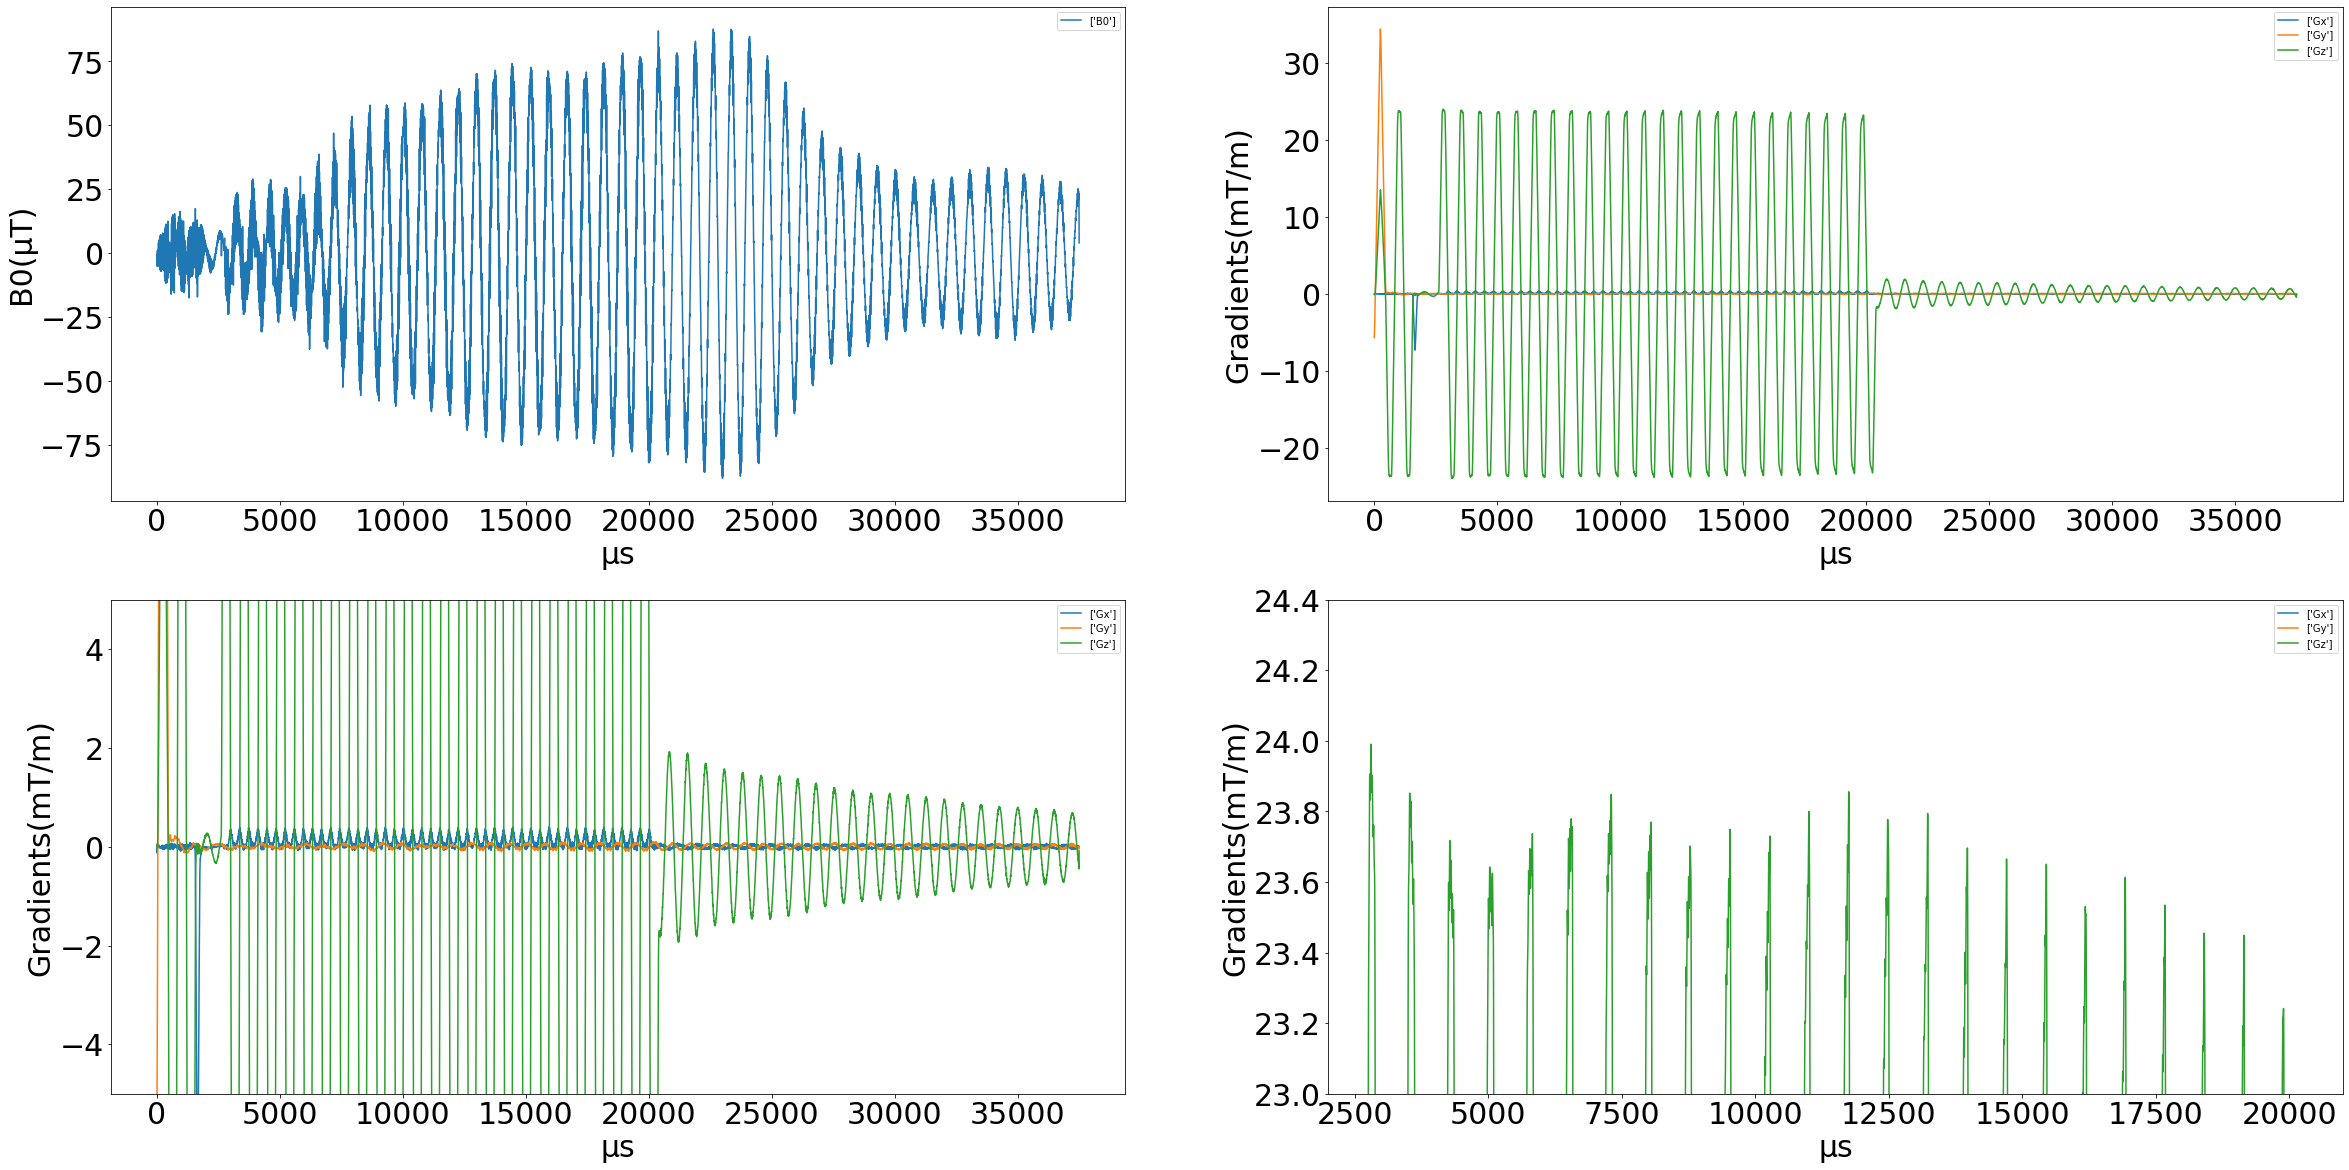

In [127]:
import matplotlib.pyplot as plt
dw_time = 1e-6
ft=30
plt.figure(figsize=(40,20))
plt.subplot(2,2,1)
plt.plot(np.diff(kmatrix[2500:,0]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e6, label=['B0'])
plt.ylabel("B0(µT)", fontsize=ft)
plt.xlabel("µs", fontsize=ft)
plt.yticks(fontsize=ft)
plt.xticks(fontsize=ft)
plt.legend()
plt.subplot(2,2,2)
plt.plot(np.diff(kmatrix[2500:,1]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gx'])
plt.plot(np.diff(kmatrix[2500:,2]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gy'])
plt.plot(np.diff(kmatrix[2500:,3]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gz'])
plt.legend()
plt.ylabel("Gradients(mT/m)", fontsize=ft)
plt.xlabel("µs", fontsize=ft)
plt.yticks(fontsize=ft)
plt.xticks(fontsize=ft)
plt.subplot(2,2,3)
plt.plot(np.diff(kmatrix[2500:,1]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gx'])
plt.plot(np.diff(kmatrix[2500:,2]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gy'])
plt.plot(np.diff(kmatrix[2500:,3]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gz'])
plt.legend()
plt.ylim(-5,5)
plt.ylabel("Gradients(mT/m)", fontsize=ft)
plt.xlabel("µs", fontsize=ft)
plt.yticks(fontsize=ft)
plt.xticks(fontsize=ft)
plt.subplot(2,2,4)
plt.plot(np.diff(kmatrix[2500:,1]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gx'])
plt.plot(np.diff(kmatrix[2500:,2]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gy'])
plt.plot(np.diff(kmatrix[2500:,3]/dw_time/(2*np.pi*42.56*1e6), axis=0)*1e3, label=['Gz'])
plt.legend()
plt.ylim(23,24.4)
plt.yticks(fontsize=ft)
plt.xticks(fontsize=ft)
plt.xlim(2000,21000)
plt.ylabel("Gradients(mT/m)", fontsize=ft)
plt.xlabel("µs", fontsize=ft)
plt.savefig("/neurospin/lrmn/people/nicolas_boulant/MeasSimon/1350Hz_FOV50.png")